<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li>
    <li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Проведение-расчетов" data-toc-modified-id="Проведение-расчетов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведение расчетов</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li>
    <li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Первая-гипотеза" data-toc-modified-id="Первая-гипотеза-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Первая гипотеза</a></span></li></ul><ul class="toc-item"><li><span><a href="#Вторая-гипотеза" data-toc-modified-id="Вторая-гипотеза-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Вторая гипотеза</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

В данной работе мы будем проводить анализ тарифов оператора сотовой связи Мегалайн. У нас есть данные 500 абонентов компании, использующих интересующие нас тарифы - Ультра и Смарт.  
Нам будет необходимо проверить, отличается ли средняя выручка от пользователей разных тарифов, а так же есть ли отличия между средней выручкой от абонентов в Москве и от абонентов из других городов.
Данные представлены в пяти таблицах. Три таблицы содержат информацию по совершенным звонкам, отправленным сообщениям, объему использованного интернета. В одной таблице содержатся данные по стоимости и наполненности тафрифов. И пятая таблица содержит данные по абонентам - их персональные данные, город проживания, время подключения тарифа.  
Сначала мы подробно ознакомимся с каждой таблицей. Приведем данные в порядок. Соберем в общую таблицу. Проведем необходимые для анализы расчеты и добавим их в таблицу. После этого проведем анализ полученных данных и проверим наши гипотезы.

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu as mwu

## Изучение данных из файла

In [2]:
calls = pd.read_csv('calls.csv')
internet = pd.read_csv('internet.csv')
messages = pd.read_csv('messages.csv')
tariffs = pd.read_csv('tariffs.csv')
users = pd.read_csv('users.csv')

In [3]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [6]:
messages.info()
messages.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [7]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
users.info()
users.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


### Вывод

Загрузили и изучили данные. Четыре таблицы содержат данные по абонентам и объемам используемых услуг связи. В пятой таблице информация по двум тарифам.  
Есть небольшое количество пустых значений, которое можно заполнить. Так же можно привести ряд данных к более удобным для нас типам. И необходимо разобраться со странным столбцом в данных об интернет сессиях.

## Подготовка данных

In [9]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

Изменили столбцы с датой в нужный формат.

In [10]:
users['churn_date'] = users['churn_date'].fillna(2018-12-31) 

users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

В описании проекта указано, что если в столбце о дате смены тарифа ничего не указано, значит тариф на момент выгрузки еще действовал. А так как данные у нас за 2018 года, заполнили пустые значения в этом столбце на 31 декабря 2018 года.  
И исправили тип данных с датами.

In [10]:
internet = internet.drop('Unnamed: 0', axis = 1)

Удалили лишний столбец в данных по интернет сессиям.

In [11]:
tariffs = tariffs.rename(columns = {'tariff_name' : 'tariff'})

Переименовали столбец в тарифах.

In [12]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [13]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [14]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [15]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.6+ MB


In [16]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


## Проведение расчетов

In [17]:
calls['month'] = calls['call_date'].dt.month

messages['month'] = messages['message_date'].dt.month

internet['month'] = internet['session_date'].dt.month

Для дальнейших расчетов добавили столбцы с месяцами.

In [18]:
calls['duration'] = np.ceil(calls['duration'])

In [19]:
calls_count = calls.groupby(
    ['user_id', 'month']).agg({'id' : 'count', 'duration' : 'sum'}).reset_index()

calls_count = calls_count.rename(columns = {'id':'calls', 'duration': 'calls_duration'})

calls_count

,user_id,month,calls,calls_duration
0,1000,5,22,159.0
1,1000,6,43,172.0
2,1000,7,47,340.0
3,1000,8,52,408.0
4,1000,9,58,466.0
...,...,...,...,...
3169,1498,10,41,247.0
3170,1499,9,9,70.0
3171,1499,10,68,449.0
3172,1499,11,74,612.0


In [20]:
calls_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3174 non-null   int64  
 1   month           3174 non-null   int64  
 2   calls           3174 non-null   int64  
 3   calls_duration  3174 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 99.3 KB


В таблице с данными по звонкам округлили длительность каждого звонка в большую сторону, согласно условию тарифакации оператора.  
Создали новую таблицу, сгруппировав данные по пользователям и месяцам.

In [21]:
messages_count = messages.groupby(
    ['user_id', 'month'])['id'].count().reset_index()

messages_count = messages_count.rename(columns = {'id' : 'messages'})

messages_count.head(15)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


In [22]:
internet_count = internet.groupby(
    ['user_id', 'month'])['mb_used'].sum().reset_index()

internet_count

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91
...,...,...,...
3198,1498,10,20579.36
3199,1499,9,1845.75
3200,1499,10,17788.51
3201,1499,11,17963.31


Создали так же две сгруппированные таблицы для данных по количеству отправляемых сообщений и по объему интернет сессий.

In [23]:
internet_count['gb_used'] = internet_count['mb_used'] / 1024

internet_count['gb_used'] = internet_count['gb_used'].apply(np.ceil)

internet_count = internet_count.drop('mb_used', axis=1)

internet_count.head(10)     

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


По условиям тарифов за используемый сверх пакета интернет оплата идет за каждый гигабайт. Для удобства дальнейших расчетов расчитали объем потраченного интернета в гигабайтах и округлили до верхнего значения, так как этого требуют условия тарификации.  
Столбец с мегабайтами удалили.

In [24]:
calls_messages = calls_count.merge(messages_count, on = ['user_id', 'month'], how = 'outer')

internet_calls_messages = calls_messages.merge(internet_count, on = ['user_id', 'month'], how = 'outer')

In [25]:
internet_calls_messages.head(10)

internet_calls_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls           3174 non-null   float64
 3   calls_duration  3174 non-null   float64
 4   messages        2717 non-null   float64
 5   gb_used         3203 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


In [26]:
calls_count['calls'].sum() == internet_calls_messages['calls'].sum()

True

In [27]:
calls_count['calls_duration'].sum() == internet_calls_messages['calls_duration'].sum()

True

In [28]:
messages_count['messages'].sum() == internet_calls_messages['messages'].sum()

True

In [29]:
internet_count['gb_used'].sum() == internet_calls_messages['gb_used'].sum()

True

In [30]:
internet_calls_messages = internet_calls_messages.fillna(0)
internet_calls_messages.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   int64  
 2   calls           3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   messages        3214 non-null   float64
 5   gb_used         3214 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 175.8 KB


Объеденили три таблицы в одну по user_id. У нас получилось немного пустых значений. Заполнили их нулями, так как в данном случае пустые знаяения означают, что конкретных абонент не пользовался этим видом связи в указанный период.

In [31]:
users_city_tariff_info = users[['user_id', 'city', 'tariff']]

users_city_tariff_info

,user_id,city,tariff
0,1000,Краснодар,ultra
1,1001,Москва,smart
2,1002,Стерлитамак,smart
3,1003,Москва,ultra
4,1004,Новокузнецк,ultra
...,...,...,...
495,1495,Иркутск,ultra
496,1496,Вологда,smart
497,1497,Челябинск,smart
498,1498,Владикавказ,smart


In [32]:
total_tab = internet_calls_messages.merge(users_city_tariff_info, on = 'user_id', how ='outer')
total_tab.head()

,user_id,month,calls,calls_duration,messages,gb_used,city,tariff
0,1000,5.0,22.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,43.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,47.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,52.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,58.0,466.0,57.0,15.0,Краснодар,ultra


In [33]:
total_tab.user_id.nunique()

500

In [34]:
total_tab_user_zero = total_tab.fillna(0)

In [35]:
total_tab_user_zero.query('month == 0 and calls == 0 and messages == 0 and gb_used == 0')

,user_id,month,calls,calls_duration,messages,gb_used,city,tariff
3214,1128,0.0,0.0,0.0,0.0,0.0,Волжский,ultra
3215,1371,0.0,0.0,0.0,0.0,0.0,Омск,smart


In [36]:
users[users['user_id'] == 1128]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [37]:
users[users['user_id'] == 1371]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [38]:
total_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3216 non-null   int64  
 1   month           3214 non-null   float64
 2   calls           3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   messages        3214 non-null   float64
 5   gb_used         3214 non-null   float64
 6   city            3216 non-null   object 
 7   tariff          3216 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.1+ KB


In [39]:
total_tab = total_tab.dropna()

total_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         3214 non-null   int64  
 1   month           3214 non-null   float64
 2   calls           3214 non-null   float64
 3   calls_duration  3214 non-null   float64
 4   messages        3214 non-null   float64
 5   gb_used         3214 non-null   float64
 6   city            3214 non-null   object 
 7   tariff          3214 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 226.0+ KB


In [40]:
types = {'month': int, 'calls' : int, 'calls_duration' : int, 'messages' : int, 'gb_used' : int}
total_tab = total_tab.astype(types)

total_tab.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         3214 non-null   int64 
 1   month           3214 non-null   int32 
 2   calls           3214 non-null   int32 
 3   calls_duration  3214 non-null   int32 
 4   messages        3214 non-null   int32 
 5   gb_used         3214 non-null   int32 
 6   city            3214 non-null   object
 7   tariff          3214 non-null   object
dtypes: int32(5), int64(1), object(2)
memory usage: 163.2+ KB


Для добавления информации по тарифам и городам абонентов, выделили эти данные в отдельную таблицу из таблицы users и добавили в общую таблицу.  
После добавления, у нас появилось два абонента, которые тарифом не пользовались вообще. Удалили их из данных.  
И привели данные в столбцах к нужному нам формату.

In [41]:
users_tariff = total_tab.merge(tariffs, on = 'tariff', how = 'outer')

users_tariff.head(10).T

,0,1,2,3,4,5,6,7,8,9
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003
month,5,6,7,8,9,10,11,12,8,9
calls,22,43,47,52,58,57,43,46,55,134
calls_duration,159,172,340,408,466,350,338,333,380,961
messages,22,60,75,81,57,73,58,70,37,91
gb_used,3,23,14,14,15,15,15,10,9,13
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra
messages_included,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
mb_per_month_included,30720,30720,30720,30720,30720,30720,30720,30720,30720,30720


In [42]:
users_tariff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   user_id                3214 non-null   int64 
 1   month                  3214 non-null   int32 
 2   calls                  3214 non-null   int32 
 3   calls_duration         3214 non-null   int32 
 4   messages               3214 non-null   int32 
 5   gb_used                3214 non-null   int32 
 6   city                   3214 non-null   object
 7   tariff                 3214 non-null   object
 8   messages_included      3214 non-null   int64 
 9   mb_per_month_included  3214 non-null   int64 
 10  minutes_included       3214 non-null   int64 
 11  rub_monthly_fee        3214 non-null   int64 
 12  rub_per_gb             3214 non-null   int64 
 13  rub_per_message        3214 non-null   int64 
 14  rub_per_minute         3214 non-null   int64 
dtypes: int32(5), int64(8)

Добавили данные с условиями тарифа и тарификацией за расходы сверх пакеты в общую таблицу.

In [43]:
users_tariff['mb_per_month_included'] = users_tariff['mb_per_month_included'] / 1024

users_tariff['mb_per_month_included'] = users_tariff['mb_per_month_included'].astype(int)

users_tariff = users_tariff.rename(columns = {'mb_per_month_included' : 'gb_per_month_included'})

Переделали мегабайты в гигабайты в таблице для дальнейших расчетов.

In [44]:
users_tariff['calls_income'] = (
    users_tariff['calls_duration'] - users_tariff['minutes_included']) * users_tariff['rub_per_minute']

users_tariff['messages_income'] = (
    users_tariff['messages'] - users_tariff['messages_included']) * users_tariff['rub_per_message']

users_tariff['internet_income'] = (
    users_tariff['gb_used'] - users_tariff['gb_per_month_included']) * users_tariff['rub_per_gb']

In [46]:
def replace_zero(data):
    if data <= 0:
        return 0
    else:
        return data
    
users_tariff['calls_income'] = users_tariff['calls_income'].apply(replace_zero)

users_tariff['messages_income'] = users_tariff['messages_income'].apply(replace_zero)

users_tariff['internet_income'] = users_tariff['internet_income'].apply(replace_zero)

In [45]:
users_tariff.tail(10).T

,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213
user_id,1498,1499,1499,1499,1499,1489,1489,1489,1489,1489
month,10,9,10,11,12,8,9,10,11,12
calls,41,9,68,74,69,0,0,0,0,0
calls_duration,247,70,449,612,492,0,0,0,0,0
messages,42,11,48,59,66,17,32,21,20,35
gb_used,21,2,18,18,13,11,17,20,18,17
city,Владикавказ,Пермь,Пермь,Пермь,Пермь,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург
tariff,smart,smart,smart,smart,smart,smart,smart,smart,smart,smart
messages_included,50,50,50,50,50,50,50,50,50,50
gb_per_month_included,15,15,15,15,15,15,15,15,15,15


In [46]:
users_tariff['total_income'] = users_tariff['calls_income'] + users_tariff['messages_income'] + users_tariff['internet_income'] + users_tariff['rub_monthly_fee']

In [47]:
users_tariff['total_income'].describe()

count    3214.000000
mean     -574.247978
std      2226.662702
min     -6534.000000
25%     -2225.000000
50%       -58.000000
75%      1050.500000
max      6770.000000
Name: total_income, dtype: float64

In [48]:
users_tariff.T

,0,1,2,3,4,5,6,7,8,9,...,3204,3205,3206,3207,3208,3209,3210,3211,3212,3213
user_id,1000,1000,1000,1000,1000,1000,1000,1000,1003,1003,...,1498,1499,1499,1499,1499,1489,1489,1489,1489,1489
month,5,6,7,8,9,10,11,12,8,9,...,10,9,10,11,12,8,9,10,11,12
calls,22,43,47,52,58,57,43,46,55,134,...,41,9,68,74,69,0,0,0,0,0
calls_duration,159,172,340,408,466,350,338,333,380,961,...,247,70,449,612,492,0,0,0,0,0
messages,22,60,75,81,57,73,58,70,37,91,...,42,11,48,59,66,17,32,21,20,35
gb_used,3,23,14,14,15,15,15,10,9,13,...,21,2,18,18,13,11,17,20,18,17
city,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Краснодар,Москва,Москва,...,Владикавказ,Пермь,Пермь,Пермь,Пермь,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург,Санкт-Петербург
tariff,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,ultra,...,smart,smart,smart,smart,smart,smart,smart,smart,smart,smart
messages_included,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,...,50,50,50,50,50,50,50,50,50,50
gb_per_month_included,30,30,30,30,30,30,30,30,30,30,...,15,15,15,15,15,15,15,15,15,15


Провели все необходимые расчеты для каждого пользователя по месяцам:  
- Посчитали выручку за потребление услуг связи сверх пакета;  
- Обнулили данные там, где в результате расчетов были получкны отрицательные значения, так как в этом случае пакет не был израсходован и дополнительной выручки абонент не принес;  
- Создали новый столбец с общей вырчкой. Там, где не было расходов сверх пакета, выручка равна абонентской плате за тариф.

## Анализ данных

In [49]:
users_tariff

,user_id,month,calls,calls_duration,messages,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,calls_income,messages_income,internet_income,total_income
0,1000,5,22,159,22,3,Краснодар,ultra,1000,30,3000,1950,150,1,1,-2841,-978,-4050,-5919
1,1000,6,43,172,60,23,Краснодар,ultra,1000,30,3000,1950,150,1,1,-2828,-940,-1050,-2868
2,1000,7,47,340,75,14,Краснодар,ultra,1000,30,3000,1950,150,1,1,-2660,-925,-2400,-4035
3,1000,8,52,408,81,14,Краснодар,ultra,1000,30,3000,1950,150,1,1,-2592,-919,-2400,-3961
4,1000,9,58,466,57,15,Краснодар,ultra,1000,30,3000,1950,150,1,1,-2534,-943,-2250,-3777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,8,0,0,17,11,Санкт-Петербург,smart,50,15,500,550,200,3,3,-1500,-99,-800,-1849
3210,1489,9,0,0,32,17,Санкт-Петербург,smart,50,15,500,550,200,3,3,-1500,-54,400,-604
3211,1489,10,0,0,21,20,Санкт-Петербург,smart,50,15,500,550,200,3,3,-1500,-87,1000,-37
3212,1489,11,0,0,20,18,Санкт-Петербург,smart,50,15,500,550,200,3,3,-1500,-90,600,-440


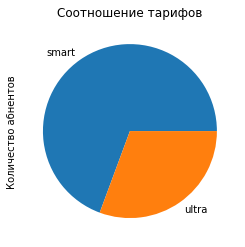

In [50]:
users_tariff.groupby('tariff')['user_id'].count().plot(
    kind = 'pie', title = 'Соотношение тарифов')
plt.ylabel('Количество абнентов')
plt.show()

In [51]:
users_tariff_smart = users_tariff.query('tariff == "smart"')

users_tariff_ultra = users_tariff.query('tariff == "ultra"')

На круговой диаграмме видно соотношение абонентов разных тарифов.  
Выделили две таблицы по тарифам.

In [52]:
def visual(data, name, kind, x, y):
    data.plot(kind = kind)
    plt.title(name)
    plt.ylabel(y)
    plt.xlabel(x)
    return plt.show()

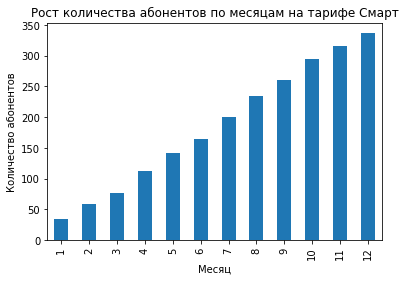

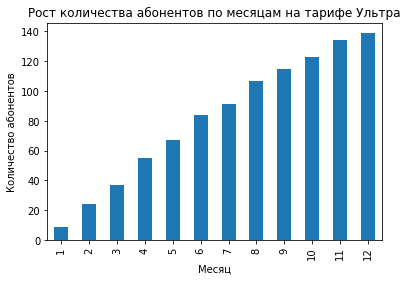

In [55]:
visual(
    users_tariff_smart.groupby('month')['user_id'].count(), 
    'Рост количества абонентов по месяцам на тарифе Смарт', 
    'bar', 'Месяц', 'Количество абонентов')

visual(
    users_tariff_ultra.groupby('month')['user_id'].count(), 
    'Рост количества абонентов по месяцам на тарифе Ультра', 
    'bar', 'Месяц', 'Количество абонентов')

На графиках видно, что количество абонентов по каждому тарифу увеличивалось с каждым месяцем.

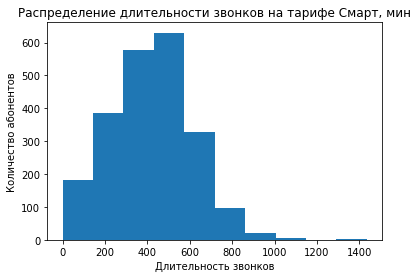

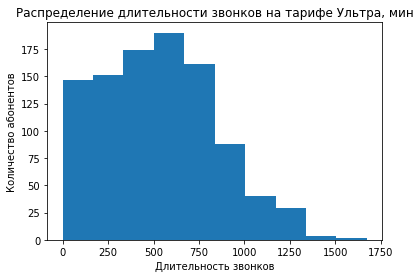

In [53]:
visual(
    users_tariff_smart['calls_duration'], 
    'Распределение длительности звонков на тарифе Смарт, мин', 
    'hist', 'Длительность звонков', 'Количество абонентов')

visual(
    users_tariff_ultra['calls_duration'], 
    'Распределение длительности звонков на тарифе Ультра, мин', 
    'hist', 'Длительность звонков', 'Количество абонентов', )

In [54]:
users_tariff_smart.groupby('month')['calls_duration'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,34.000000,58.000000,77.000000,112.000000,141.000000,164.000000,201.000000,235.000000,260.000000,294.000000,316.000000,337.000000
mean,203.852941,298.689655,390.051948,367.133929,387.361702,395.640244,408.353234,421.468085,428.611538,426.136054,435.265823,478.560831
std,154.231454,190.820041,191.893604,186.489161,186.601343,175.336587,179.583601,186.530382,183.126576,188.128510,177.778618,199.245131
min,0.000000,2.000000,13.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,78.250000,137.000000,234.000000,222.000000,213.000000,272.750000,281.000000,287.500000,297.250000,296.250000,310.750000,340.000000
50%,162.500000,258.000000,409.000000,368.500000,433.000000,400.000000,414.000000,432.000000,435.000000,427.500000,428.500000,471.000000
75%,325.250000,457.500000,530.000000,493.500000,512.000000,521.000000,535.000000,537.500000,549.000000,549.000000,554.250000,600.000000
max,551.000000,747.000000,822.000000,785.000000,820.000000,875.000000,839.000000,1000.000000,843.000000,1005.000000,954.000000,1435.000000


In [55]:
users_tariff_ultra.groupby('month')['calls_duration'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,9.000000,24.000000,37.000000,55.000000,67.000000,84.000000,91.000000,107.000000,115.000000,123.000000,134.000000,139.000000
mean,428.111111,297.125000,489.648649,458.018182,510.328358,479.702381,545.791209,510.775701,539.443478,558.081301,541.380597,592.805755
std,269.757968,296.512528,333.743765,267.682405,289.603511,302.549081,307.119322,312.980026,325.141162,326.289110,310.757232,342.456321
min,55.000000,0.000000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.000000,59.500000,256.000000,278.000000,315.500000,233.250000,309.000000,278.500000,291.000000,328.000000,306.250000,333.000000
50%,382.000000,168.000000,403.000000,453.000000,519.000000,479.000000,542.000000,500.000000,520.000000,533.000000,546.000000,584.000000
75%,466.000000,516.750000,626.000000,632.500000,692.000000,692.750000,766.000000,738.000000,784.500000,804.500000,721.750000,821.500000
max,861.000000,919.000000,1609.000000,1096.000000,1232.000000,1410.000000,1311.000000,1321.000000,1297.000000,1401.000000,1257.000000,1673.000000


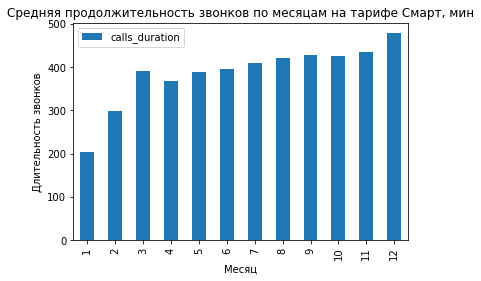

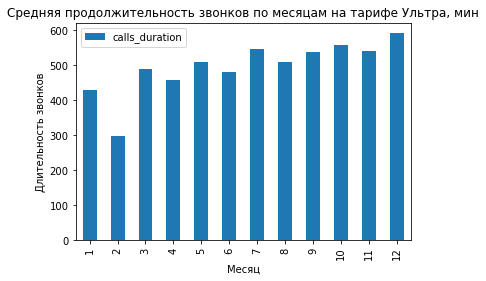

In [56]:
visual(
    users_tariff_smart.pivot_table(
    index = 'month', values = 'calls_duration'), 
    'Средняя продолжительность звонков по месяцам на тарифе Смарт, мин', 
    'bar', 'Месяц', 'Длительность звонков')

visual(
    users_tariff_ultra.pivot_table(
    index = 'month', values = 'calls_duration'), 
    'Средняя продолжительность звонков по месяцам на тарифе Ультра, мин', 
    'bar', 'Месяц', 'Длительность звонков')

Распределение длительности звонков на двух тарифах стремится к нормальному.  
Абоненты с тарифом Смарт чаще проговаривуют около 450 минут в месяц. Совсем редко тратят больше 800 минут в месяц. Абоненты с тарифом Ультра чаще проговаривают чуть больше 550 минут.
От месяца к месяцу среднее количтво использованных минут растет на обоих тарифах.

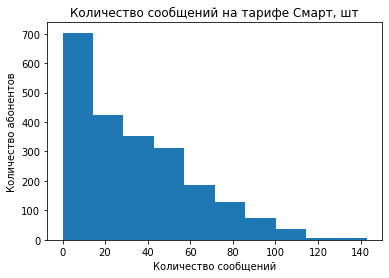

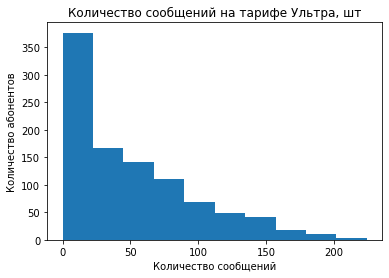

In [57]:
visual(
    users_tariff_smart['messages'], 
    'Количество сообщений на тарифе Смарт, шт', 
    'hist', 'Количество сообщений', 'Количество абонентов')

visual(
    users_tariff_ultra['messages'], 
    'Количество сообщений на тарифе Ультра, шт', 
    'hist', 'Количество сообщений', 'Количество абонентов')

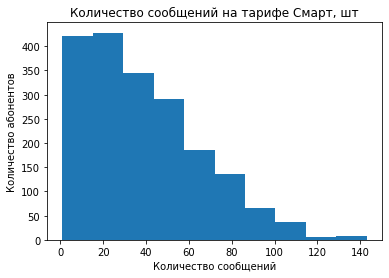

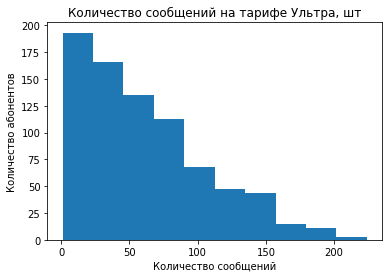

In [61]:
visual(
    users_tariff_smart[users_tariff_smart['messages'] > 0]['messages'], 
    'Количество сообщений на тарифе Смарт, шт', 
    'hist', 'Количество сообщений', 'Количество абонентов')

visual(
    users_tariff_ultra[users_tariff_ultra['messages'] > 0]['messages'], 
    'Количество сообщений на тарифе Ультра, шт', 
    'hist', 'Количество сообщений', 'Количество абонентов')

In [58]:
users_tariff_smart.groupby('month')['messages'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,34.000000,58.000000,77.000000,112.000000,141.000000,164.000000,201.000000,235.000000,260.000000,294.000000,316.000000,337.000000
mean,18.235294,24.086207,31.857143,30.741071,33.773050,33.402439,33.751244,33.638298,33.638462,33.765306,34.075949,35.994065
std,16.197753,21.750809,26.804710,24.538532,27.036845,28.404337,28.282288,28.952677,28.117927,28.567673,28.389031,30.576990
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000,6.000000,11.000000,9.750000,11.000000,9.750000,10.000000,11.000000,10.000000,10.000000,11.000000,11.000000
50%,15.000000,20.000000,23.000000,28.000000,30.000000,28.000000,29.000000,27.000000,30.000000,30.000000,28.000000,29.000000
75%,28.000000,38.000000,48.000000,47.000000,50.000000,51.000000,52.000000,51.000000,50.250000,51.000000,51.250000,55.000000
max,74.000000,85.000000,110.000000,105.000000,103.000000,134.000000,137.000000,134.000000,136.000000,139.000000,124.000000,143.000000


In [59]:
users_tariff_ultra.groupby('month')['messages'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,9.000000,24.000000,37.000000,55.000000,67.000000,84.000000,91.000000,107.000000,115.000000,123.000000,134.000000,139.000000
mean,33.777778,21.958333,32.297297,31.563636,37.850746,41.726190,49.846154,48.439252,52.286957,58.430894,55.791045,60.611511
std,30.670742,26.773574,41.621886,37.513831,40.306874,44.567899,48.703621,46.601923,46.398874,51.934398,49.768951,51.787821
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,2.000000,5.500000,4.500000,6.500000,11.000000,11.000000,14.250000,20.000000
50%,32.000000,5.500000,20.000000,17.000000,25.000000,27.500000,38.000000,40.000000,43.000000,49.000000,43.000000,51.000000
75%,57.000000,45.500000,54.000000,53.000000,55.000000,62.000000,75.000000,78.000000,82.000000,94.000000,86.500000,87.000000
max,75.000000,90.000000,155.000000,143.000000,148.000000,201.000000,211.000000,180.000000,188.000000,223.000000,197.000000,224.000000


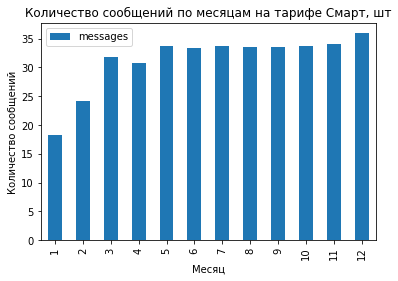

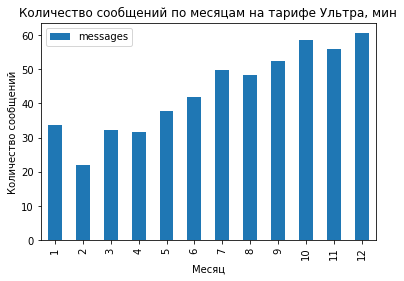

In [60]:
visual(
    users_tariff_smart.pivot_table(
    index = 'month', values = 'messages'), 
    'Количество сообщений по месяцам на тарифе Смарт, шт', 
    'bar', 'Месяц', 'Количество сообщений')

visual(
    users_tariff_ultra.pivot_table(
    index = 'month', values = 'messages'), 
    'Количество сообщений по месяцам на тарифе Ультра, мин', 
    'bar', 'Месяц', 'Количество сообщений')

Среди абонентов каждого тарифа есть те, кто вообще не пользуется текстовыми сообщениями. На тарифе Смарт чаще используют в месяц около 20-30 сообщений, на тарифе Ультра - около 40-50.  
По месяцам в среднем количство сообщений на тарифе Смарт почти не меняется с мая, значительный рост есть только в декабре.  
На тарифе Ульра среднее значение растет с небольшими колебаниями. 

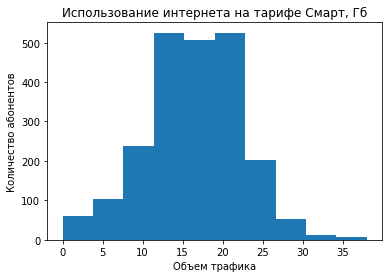

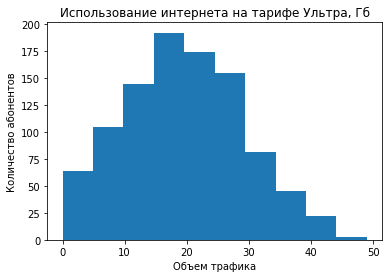

In [61]:
visual(
    users_tariff_smart['gb_used'], 
    'Использование интернета на тарифе Смарт, Гб', 
    'hist', 'Объем трафика', 'Количество абонентов')

visual(
    users_tariff_ultra['gb_used'], 
    'Использование интернета на тарифе Ультра, Гб', 
    'hist', 'Объем трафика', 'Количество абонентов')

In [62]:
users_tariff_smart.groupby('month')['gb_used'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,34.000000,58.000000,77.000000,112.0000,141.000000,164.000000,201.000000,235.000000,260.000000,294.000000,316.000000,337.000000
mean,8.735294,11.844828,15.233766,13.6250,15.907801,15.951220,15.875622,16.736170,16.392308,16.880952,17.000000,18.201780
std,6.277950,6.095157,5.705252,5.5946,5.862594,5.649046,5.780956,5.480986,5.087643,5.735594,5.213535,5.457705
min,1.000000,1.000000,2.000000,1.0000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000
25%,3.250000,8.000000,11.000000,9.7500,13.000000,12.750000,12.000000,13.500000,13.000000,14.000000,14.000000,15.000000
50%,7.000000,13.000000,16.000000,14.0000,16.000000,16.000000,16.000000,17.000000,16.000000,17.000000,17.000000,18.000000
75%,11.750000,15.000000,20.000000,18.0000,20.000000,20.000000,20.000000,20.000000,20.000000,21.000000,20.000000,22.000000
max,24.000000,28.000000,25.000000,27.0000,30.000000,34.000000,29.000000,31.000000,31.000000,32.000000,36.000000,38.000000


In [63]:
users_tariff_ultra.groupby('month')['gb_used'].describe().T

month,1,2,3,4,5,6,7,8,9,10,11,12
count,9.000000,24.000000,37.000000,55.000000,67.000000,84.000000,91.000000,107.000000,115.000000,123.000000,134.000000,139.000000
mean,13.222222,12.000000,17.648649,16.963636,19.373134,18.940476,20.505495,19.598131,19.243478,20.065041,19.805970,21.741007
std,6.666667,10.446551,10.693238,9.457436,9.779130,9.077114,9.819905,10.254184,9.287410,9.552907,9.684867,10.160550
min,1.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.750000,7.000000,10.500000,12.500000,12.000000,14.000000,12.000000,12.000000,14.000000,12.250000,15.000000
50%,15.000000,7.500000,18.000000,17.000000,19.000000,19.500000,20.000000,19.000000,20.000000,20.000000,18.500000,22.000000
75%,19.000000,20.250000,28.000000,23.000000,27.000000,25.000000,27.000000,28.000000,26.500000,26.000000,27.000000,28.000000
max,20.000000,32.000000,37.000000,37.000000,43.000000,42.000000,45.000000,48.000000,42.000000,49.000000,44.000000,43.000000


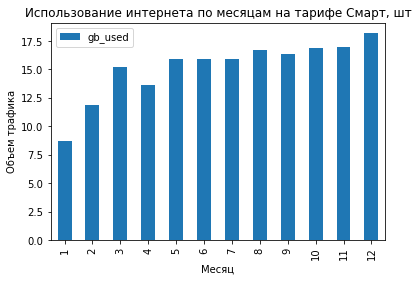

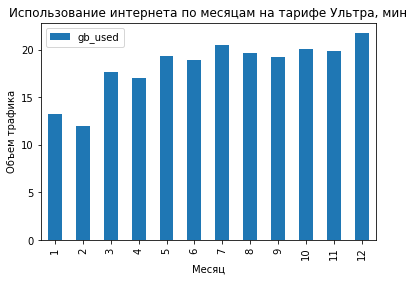

In [64]:
visual(
    users_tariff_smart.pivot_table(
    index = 'month', values = 'gb_used'), 
    'Использование интернета по месяцам на тарифе Смарт, шт', 
    'bar', 'Месяц', 'Объем трафика')

visual(
    users_tariff_ultra.pivot_table(
    index = 'month', values = 'gb_used'), 
    'Использование интернета по месяцам на тарифе Ультра, мин', 
    'bar', 'Месяц', 'Объем трафика')

Распреление использования интернета так же стремится к нормальному. На тарифе Смарт в среднем используют от 12 до 23 Гб в месяц, на тарифе Ультра - от 15 до 25.  
От месяца к месяцу средний объем трафика увеличивается.



In [65]:
var_calls_smart = np.var(users_tariff_smart['calls_duration'], ddof = 1)

std_calls_smart = np.sqrt(var_calls_smart)

print('Дисперсия равна:', var_calls_smart)
print('Стандартное отклонение равно:', std_calls_smart)

Дисперсия равна: 36219.315784344246
Стандартное отклонение равно: 190.3137298892128


In [66]:
var_calls_ultra = np.var(users_tariff_ultra['calls_duration'], ddof = 1)

std_calls_ultra = np.sqrt(var_calls_ultra)

print('Дисперсия равна:', var_calls_ultra)
print('Стандартное отклонение равно:', std_calls_ultra)

Дисперсия равна: 100873.63339730089
Стандартное отклонение равно: 317.60609785912624


In [68]:
var_messages_smart = np.var(users_tariff_smart['messages'], ddof = 1)

std_messages_smart = np.sqrt(var_messages_smart)

print('Дисперсия равна:', var_messages_smart)
print('Стандартное отклонение равно:', std_messages_smart)

Дисперсия равна: 796.8129584480083
Стандартное отклонение равно: 28.22787555676141


In [69]:
var_messages_ultra = np.var(users_tariff_ultra['messages'], ddof = 1)

std_messages_ultra = np.sqrt(var_messages_ultra)

print('Дисперсия равна:', var_messages_ultra)
print('Стандартное отклонение равно:', std_messages_ultra)

Дисперсия равна: 2285.2661425446827
Стандартное отклонение равно: 47.804457350174815


In [70]:
var_internet_smart = np.var(users_tariff_smart['gb_used'], ddof = 1)

std_internet_smart = np.sqrt(var_internet_smart)

print('Дисперсия равна:', var_internet_smart)
print('Стандартное отклонение равно:', std_internet_smart)

Дисперсия равна: 33.02870517811158
Стандартное отклонение равно: 5.747060568509052


In [71]:
var_internet_ultra = np.var(users_tariff_ultra['gb_used'], ddof = 1)
std_internet_ultra = np.sqrt(var_internet_ultra)

print('Дисперсия равна:', var_internet_ultra)
print('Стандартное отклонение равно:', std_internet_ultra)

Дисперсия равна: 97.09168626965472
Стандартное отклонение равно: 9.8535113675103


In [72]:
users_tariff_ultra.pivot_table(
    index='month', values = ['calls_duration', 'messages', 'gb_used'], aggfunc = [np.var, np.std])

var                                     std             \
      calls_duration     gb_used     messages calls_duration    gb_used   
month                                                                     
1       72769.361111   44.444444   940.694444     269.757968   6.666667   
2       87919.679348  109.130435   716.824275     296.512528  10.446551   
3      111384.900901  114.345345  1732.381381     333.743765  10.693238   
4       71653.870034   89.443098  1407.287542     267.682405   9.457436   
5       83870.193578   95.631389  1624.644052     289.603511   9.779130   
6       91535.946500   82.394005  1986.297619     302.549081   9.077114   
7       94322.278144   96.430525  2372.042735     307.119322   9.819905   
8       97956.496385  105.148298  2171.739199     312.980026  10.254184   
9      105716.775286   86.255988  2152.855530     325.141162   9.287410   
10     106464.583500   91.258030  2697.181661     326.289110   9.552907   
11      96570.057064   93.796656  2476.948491     310.757232   9.684867   
12     117276.331561  103.236784  2681.978417     342.456321  10.160550   

                  
        messages  
month             
1      30.670742  
2      26.773574  
3      41.621886  
4      37.513831  
5      40.306874  
6      44.567899  
7      48.703621  
8      46.601923  
9      46.398874  
10     51.934398  
11     49.768951  
12     51.787821

In [76]:
users_tariff_smart.pivot_table(
    index='month', values = ['calls_duration', 'messages', 'gb_used'], aggfunc = [np.var, np.std])

var                                   std            \
      calls_duration    gb_used    messages calls_duration   gb_used   
month                                                                  
1       23787.341355  39.412656  262.367201     154.231454  6.277950   
2       36412.287961  37.150938  473.097701     190.820041  6.095157   
3       36823.155161  32.549897  718.492481     191.893604  5.705252   
4       34778.207127  31.299550  602.139559     186.489161  5.594600   
5       34820.061094  34.370010  730.990983     186.601343  5.862594   
6       30742.918861  31.911716  806.806374     175.336587  5.649046   
7       32250.269602  33.419453  799.887811     179.583601  5.780956   
8       34793.583379  30.041207  838.257501     186.530382  5.480986   
9       33535.342723  25.884110  790.617820     183.126576  5.087643   
10      35392.336375  32.897042  816.111966     188.128510  5.735594   
11      31605.237050  27.180952  805.937071     177.778618  5.213535   
12      39698.622033  29.786544  934.952346     199.245131  5.457705   

                  
        messages  
month             
1      16.197753  
2      21.750809  
3      26.804710  
4      24.538532  
5      27.036845  
6      28.404337  
7      28.282288  
8      28.952677  
9      28.117927  
10     28.567673  
11     28.389031  
12     30.576990

Расчитали дисперсию и стандартное отклонение для каждого вида услуг по каждому тарифу по всем данным.

## Проверка гипотез

### Первая гипотеза

<b>H<sub>0</sub>:</b> средняя выручка пользователей тарифов Ультра равна средней выручке пользователей тарифов Смарт.  
<b>H<sub>1</sub>:</b> средняя выручка пользователей тарифов Ультра не равна (больше или меньше) средней выручке пользователей тарифов Смарт.

In [73]:
income_smart = users_tariff_smart['total_income']
income_ultra = users_tariff_ultra['total_income']

In [74]:
income_smart_var = np.var(users_tariff_smart['total_income'])
income_smart_var

2146461.870374227

In [75]:
income_ultra_var = np.var(users_tariff_ultra['total_income'])
income_ultra_var

2478552.6853420604

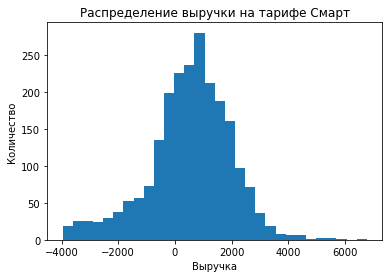

In [76]:
income_smart.plot(kind = 'hist', bins = 30, title = 'Распределение выручки на тарифе Смарт')
plt.ylabel('Количество')
plt.xlabel('Выручка')
plt.show()

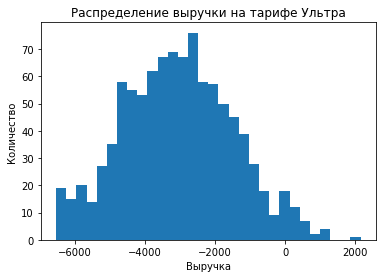

In [77]:
income_ultra.plot(kind = 'hist', bins = 30, title = 'Распределение выручки на тарифе Ультра')
plt.ylabel('Количество')
plt.xlabel('Выручка')
plt.show()

In [78]:
alpha = 0.05

total_result_tariffs = st.ttest_ind(income_smart, income_ultra, equal_var = False)

print('p-значение:', total_result_tariffs.pvalue)

if total_result_tariffs.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


In [79]:
stat, p = mwu(income_smart, income_ultra)

print('p-значение:', p)

if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


Для проверки гипотез сформировали две совокупности данных по среднему доходу от пользователей на каждом тарифе.  
Сформулировали нулевую и альтернативную гипотезы. Критерий значимости выбрали равным 5%.  
В результате проверки нулевой гипотезы p-value получилось очень маленьким, соответственно мы отвергли нулевую гипотезу.  
Вероятность того, что средняя вырочка от пользователей разных тарифов будет равна  - слишком мала. 

### Вторая гипотеза

<b>H<sub>0</sub>:</b> средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.  
<b>H<sub>1</sub>:</b> средняя выручка пользователей из Москвы не равна (больше или меньше) средней выручке пользователей из других регионов.

In [80]:
income_moscow = users_tariff.query('city == "Москва"')['total_income']
income_other = users_tariff.query('city != "Москва"')['total_income']

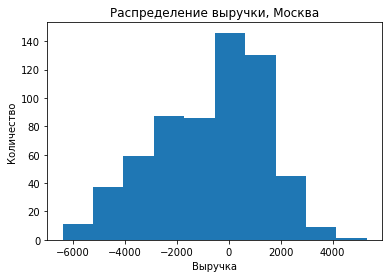

In [82]:
income_moscow.plot(kind = 'hist', title = 'Распределение выручки, Москва')
plt.ylabel('Количество')
plt.xlabel('Выручка')
plt.show()

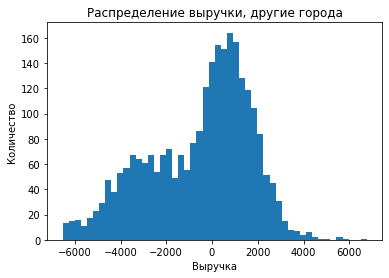

In [83]:
income_other.plot(kind = 'hist', bins = 50, title = 'Распределение выручки, другие города')
plt.ylabel('Количество')
plt.xlabel('Выручка')
plt.show()

In [84]:
alpha = 0.05

total_result_cities = st.ttest_ind(income_moscow, income_other)

print('p-значение:', total_result_cities.pvalue)

if total_result_cities.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.08358183312790388
Не получилось отвергнуть нулевую гипотезу


In [85]:
stat, p = mwu(income_moscow, income_other)

print('p-значение:', p)

if p < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.019037294064061874
Отвергаем нулевую гипотезу


Для проверки второй гипотезы сфромировали две совокупности данных без разделения по тарифам - выручка от абонентов из Москвы и выручка от абонентов из других городов.  
Сформировали нулевую и альтернативную гипотезы.  
В результате проверки p-value получсился очень большим. Мы не можем с уверенностью утверждать, что средняя выручка от абонентов Москвы и абонентов других городов отличается, в 36 случаях из 100 средняя выручка может быть примерно равной.

## Общий вывод

Мы провели анализ выборки из 498 абонентов Мегалайн, использующих интересующие нас тарифы. Около 30% из выборки пользуются тарифом Ультра, остальные Смарт. Пользователи тарифа Смарт в среднем пользуется меньшим объемом услуг, но чаще выходят за рамки своего пакета. Стандартные отклонения используемых объемов услуг достаточно большие в каждом тарифе.  

В результате анализа мы проверили две гипотезы.  
В первом случае мы сравнивали среднюю выручку по разным тарифам. Нулевая гипотеза в данном случае была, что средняя выручка пользователей обоих тарифов равна. Эта гипотеза не подтердилась. С очень большой вероятностью мы можем предположить, что выручка по тарифам отличается.  
Во втором случае мы сравнивали среднюю выручку по населенным пунктам. В этом случае нулевая гипотеза предполагала, что средняя выручка от абонетов, проживающих в Москве, равна средней выручке абонентов из других городов. Вероятность этого оказалась достаточно высокой, соответственно средняя выручка по абонентам разных регионов может не отличаться.
